In [216]:
#cmp3749m_myronfurtado_19703402_1 

In [217]:
#install Packages if needed(uncomment them run them, if needed)
#!pip install findspark
#!pip install pyspark

#!pip install jupyter
#!pip install pip
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install matplotlib-inline
#!pip install seaborn

In [218]:
#importing the libraries i will need later
from pyspark.sql.types import StructType,StructField,StringType,IntegerType
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# schema for use with our own created dataframes later.. we could have loaded it from a CSV? Yes, just do inferSchema=True
#schema = StructType([StructField("text",StringType(),True),StructField("label", IntegerType(), True)])

In [219]:
#INITALISE SPARK
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()     #same as spark=SparkContext() or sc =SparkContext()
df = spark.sql("select 'Spark' as Hello")
#df = spark.sql("select 'spark', 'myron' as hello")
df.show()

+-----+
|Hello|
+-----+
|Spark|
+-----+



In [220]:
#loading the dataset into a Pyspark dataframe using Python

df = spark.read.csv("nuclear_plants_small_dataset.csv", inferSchema=True, header=True)

#n=number of rows to display, truncate= no of characters
df.show(n=10, truncate=50)

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Normal|              4.5044|              0.7443|                 6.34|              1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|           15.3429|            1.2186|
|Normal|        

In [221]:
#checking Schema and datatypes
df.printSchema()

root
 |-- Status: string (nullable = true)
 |-- Power_range_sensor_1: double (nullable = true)
 |-- Power_range_sensor_2: double (nullable = true)
 |-- Power_range_sensor_3 : double (nullable = true)
 |-- Power_range_sensor_4: double (nullable = true)
 |-- Pressure _sensor_1: double (nullable = true)
 |-- Pressure _sensor_2: double (nullable = true)
 |-- Pressure _sensor_3: double (nullable = true)
 |-- Pressure _sensor_4: double (nullable = true)
 |-- Vibration_sensor_1: double (nullable = true)
 |-- Vibration_sensor_2: double (nullable = true)
 |-- Vibration_sensor_3: double (nullable = true)
 |-- Vibration_sensor_4: double (nullable = true)



In [222]:
#check the number of rows in df
print("row count:  ", df.count())
print("\n")

#get dataframe size and shape, as Spark df has no .shape() attribute
print(df.count(), len(df.columns))

row count:   996


996 13


In [223]:
#read the file using pandas(for reference)
import pandas as pd

#data = pd.read_csv("nuclear_plants_small_dataset.csv", sep=",")
#data

#count the number of rows
#data.count()

#to check the shape of pandas dataframe
#data.shape

In [224]:
#task 1

# Find count for empty, None, Null, Nan with string literals.
from pyspark.sql.functions import col, isnan, when, count

df1 = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NONE') | \
                            col(c).contains('NULL') | \
                            col(c).contains('null') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df1.show()

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|     0|                   0|                   0|                    0|                   0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|
+------+--------

In [225]:
#task 2
#convert spark df to pandas df
pandas_df = df.toPandas()
#print(pandas_df)

#Selects the only the rows where the status is "Normal" and saves them to a variable dfNormal
dfNormal = pandas_df.loc[pandas_df['Status'] == "Normal"]
#print(dfNormal)
#Selects the only the rows where the status is "Abnormal" and saves them to a variable dfAbnormal
dfAbnormal = pandas_df.loc[pandas_df['Status'] == "Abnormal"]
#print(dfAbnormal)

#dropping Status Column
normalDropDF = dfNormal.drop(['Status'], axis=1)
abnormalDropDF = dfAbnormal.drop(['Status'], axis=1)
#print(abnormalDropDF)

In [226]:
#calculate the Minimum for features of dfNormal or dfAbnormal groups using df.min() Pandas function
minNormal = normalDropDF.min()
minAbnormal= abnormalDropDF.min()
#Used to print the value of the return statement. 
print("The minimum values for Normal group: ")
print(minNormal)
#Print the minimum value for Abnormal group
print("\nThe minimum values for Abnormal group: ") 
print(minAbnormal)


The minimum values for Normal group: 
Power_range_sensor_1     0.0851
Power_range_sensor_2     0.0403
Power_range_sensor_3     4.3826
Power_range_sensor_4     0.1547
Pressure _sensor_1       0.0248
Pressure _sensor_2       0.0104
Pressure _sensor_3       0.0774
Pressure _sensor_4       0.0058
Vibration_sensor_1       0.0092
Vibration_sensor_2       0.0277
Vibration_sensor_3       0.0646
Vibration_sensor_4       0.0831
dtype: float64

The minimum values for Abnormal group: 
Power_range_sensor_1     0.008200
Power_range_sensor_2     0.389100
Power_range_sensor_3     2.583966
Power_range_sensor_4     0.062300
Pressure _sensor_1       0.131478
Pressure _sensor_2       0.008262
Pressure _sensor_3       0.001224
Pressure _sensor_4       0.029478
Vibration_sensor_1       0.000000
Vibration_sensor_2       0.018500
Vibration_sensor_3       0.131784
Vibration_sensor_4       0.009200
dtype: float64


In [227]:
#calculate the Mean features of dfNormal or dfAbnormal groups using df.max() Pandas function
maxNormal = normalDropDF.max()
maxAbnormal = abnormalDropDF.max()
print("\nThe maximum values for Normal group: ")
print(maxNormal)
print("\nThe maximum values for Abnormal group: ")
print(maxAbnormal)


The maximum values for Normal group: 
Power_range_sensor_1     12.1298
Power_range_sensor_2     11.9284
Power_range_sensor_3     14.0982
Power_range_sensor_4     16.3568
Pressure _sensor_1       56.8562
Pressure _sensor_2        9.2212
Pressure _sensor_3       12.6475
Pressure _sensor_4       15.1085
Vibration_sensor_1       31.4981
Vibration_sensor_2       34.8676
Vibration_sensor_3       53.2384
Vibration_sensor_4       43.2314
dtype: float64

The maximum values for Abnormal group: 
Power_range_sensor_1     10.923078
Power_range_sensor_2     10.154100
Power_range_sensor_3     15.759900
Power_range_sensor_4     17.235858
Pressure _sensor_1       67.979400
Pressure _sensor_2       10.242738
Pressure _sensor_3       11.772400
Pressure _sensor_4       16.555620
Vibration_sensor_1       36.186438
Vibration_sensor_2       34.331466
Vibration_sensor_3       36.911454
Vibration_sensor_4       26.466900
dtype: float64


In [228]:
#calculate the Mean features of dfNormal or dfAbnormal groups using df.mean() Pandas function
meanNormal = normalDropDF.mean()
meanAbnormal = abnormalDropDF.mean()
print("\nThe Mean values for Normal group: ")
print(meanNormal)
print("\nThe Mean values for Abnormal group")
print(meanAbnormal)


The Mean values for Normal group: 
Power_range_sensor_1      5.602453
Power_range_sensor_2      6.844503
Power_range_sensor_3      9.292054
Power_range_sensor_4      8.701398
Pressure _sensor_1       13.797526
Pressure _sensor_2        3.415646
Pressure _sensor_3        5.923353
Pressure _sensor_4        5.586180
Vibration_sensor_1        8.441437
Vibration_sensor_2        9.699616
Vibration_sensor_3       19.437804
Vibration_sensor_4       10.925098
dtype: float64

The Mean values for Abnormal group
Power_range_sensor_1      4.396695
Power_range_sensor_2      5.914043
Power_range_sensor_3      9.164170
Power_range_sensor_4      6.009146
Pressure _sensor_1       14.600728
Pressure _sensor_2        2.740270
Pressure _sensor_3        5.575115
Pressure _sensor_4        4.407824
Vibration_sensor_1        7.887689
Vibration_sensor_2       10.303570
Vibration_sensor_3       10.938159
Vibration_sensor_4        8.942085
dtype: float64


In [229]:
#calculate the Median features of dfNormal or dfAbnormal groups using the df.median() Pandas function
medianNormal = normalDropDF.median()
medianAbnormal = abnormalDropDF.median()
print("\nThe Median values for Normal group: ")
print(medianNormal)
print("\nThe Median values for Abnormal group")
print(medianAbnormal)


The Median values for Normal group: 
Power_range_sensor_1      5.17865
Power_range_sensor_2      6.71765
Power_range_sensor_3      9.26285
Power_range_sensor_4      9.24085
Pressure _sensor_1       10.63480
Pressure _sensor_2        3.11300
Pressure _sensor_3        5.73940
Pressure _sensor_4        4.25915
Vibration_sensor_1        7.44990
Vibration_sensor_2        8.70075
Vibration_sensor_3       16.46450
Vibration_sensor_4        9.48545
dtype: float64

The Median values for Abnormal group
Power_range_sensor_1      4.513550
Power_range_sensor_2      5.932218
Power_range_sensor_3      9.472050
Power_range_sensor_4      5.399300
Pressure _sensor_1       12.596150
Pressure _sensor_2        2.382689
Pressure _sensor_3        5.744257
Pressure _sensor_4        3.322575
Vibration_sensor_1        6.535950
Vibration_sensor_2        8.973100
Vibration_sensor_3        8.987269
Vibration_sensor_4        8.137600
dtype: float64


In [230]:
#Mode For Normal group
#create alist to append the mode values to
temp= []
#go through each colum and check its highest repeating number
for i in normalDropDF.columns:
    temp.append(normalDropDF[i].value_counts().idxmax())
print("\nMode for Normal: ", temp)
#Mode For Abnormal group
temp=[]
#go through each colum and check its highest repeating number
for i in abnormalDropDF.columns:
    temp.append(abnormalDropDF[i].value_counts().idxmax())
print("\nMode for Abnormal: ", temp)


Mode for Normal:  [9.6341, 6.8005, 10.5588, 6.5067, 3.0697, 4.0702, 6.9069, 0.2381, 0.4339, 4.0804, 3.231, 3.7665]

Mode for Abnormal:  [0.1273, 3.2648, 9.1443, 11.3507, 12.382698, 2.3801, 5.0516, 0.864246, 3.3418, 10.06587, 3.794706, 17.3461]


In [231]:
#variance values
varianceNormal = normalDropDF.var()
varianceAbnormal = abnormalDropDF.var()
print("\nVariance on the Normal group: ")
print(varianceNormal)
print("\nVariance on the Abnormal group: ")
print(varianceAbnormal)


Variance on the Normal group: 
Power_range_sensor_1       8.374354
Power_range_sensor_2       4.880531
Power_range_sensor_3       4.173689
Power_range_sensor_4      20.053994
Pressure _sensor_1       138.372573
Pressure _sensor_2         4.806673
Pressure _sensor_3         6.499049
Pressure _sensor_4        18.372682
Vibration_sensor_1        38.527948
Vibration_sensor_2        49.060657
Vibration_sensor_3       193.136243
Vibration_sensor_4        67.309371
dtype: float64

Variance on the Abnormal group: 
Power_range_sensor_1       6.201490
Power_range_sensor_2       5.392429
Power_range_sensor_3       8.654818
Power_range_sensor_4      14.280947
Pressure _sensor_1       134.425624
Pressure _sensor_2         4.014422
Pressure _sensor_3         6.215757
Pressure _sensor_4        15.669185
Vibration_sensor_1        37.613416
Vibration_sensor_2        58.505506
Vibration_sensor_3        66.679536
Vibration_sensor_4        36.893423
dtype: float64


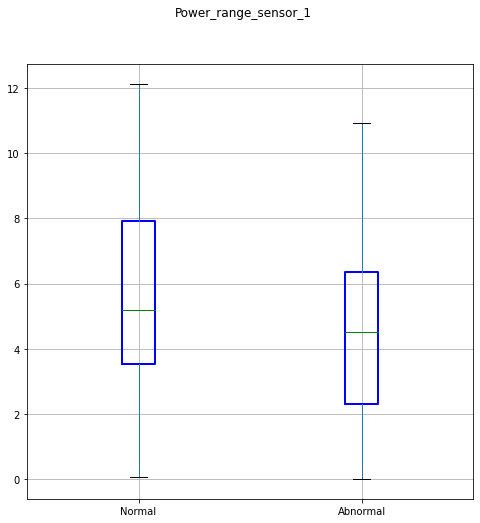

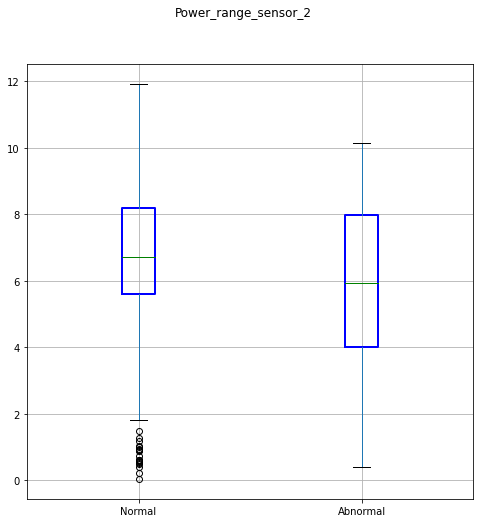

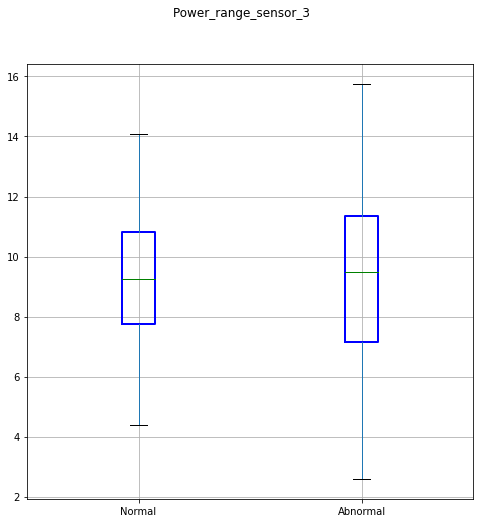

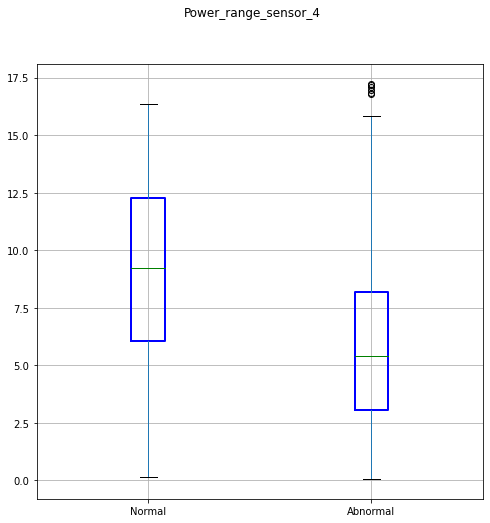

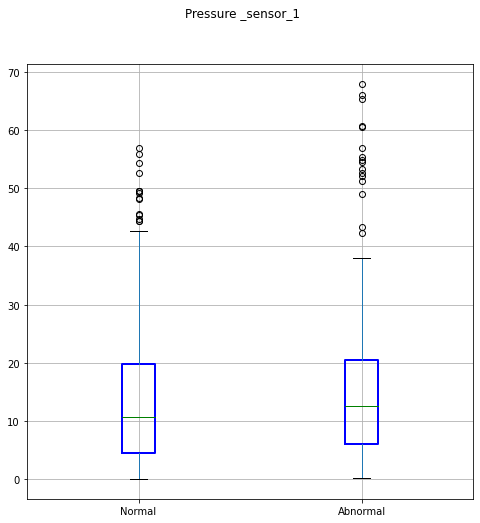

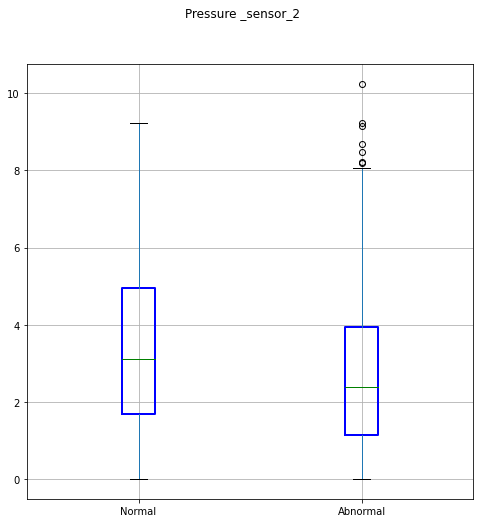

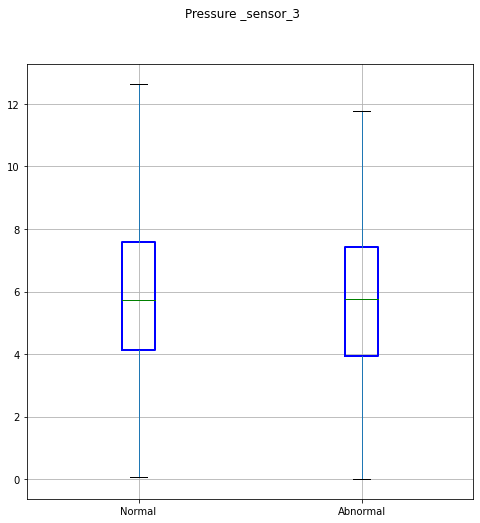

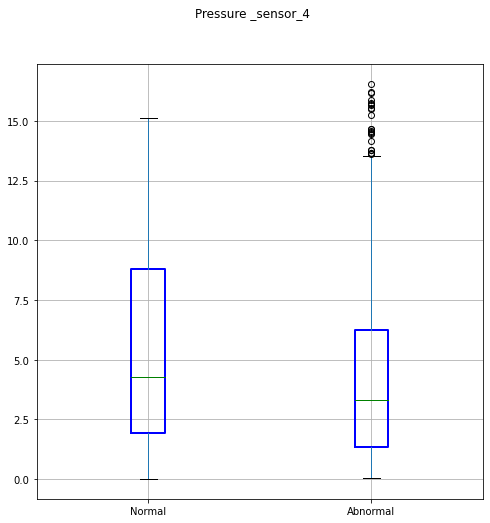

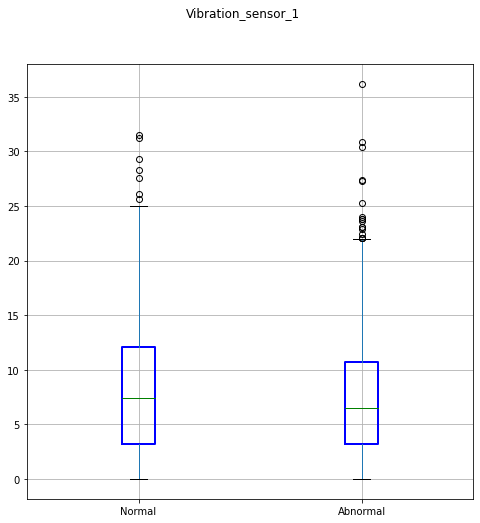

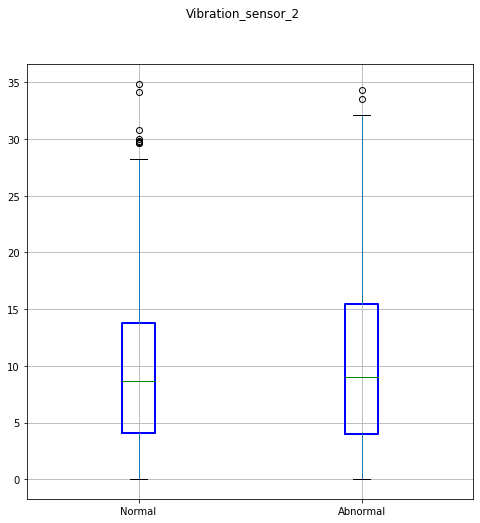

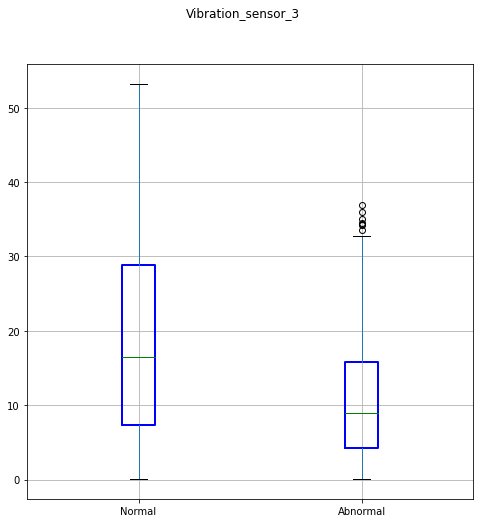

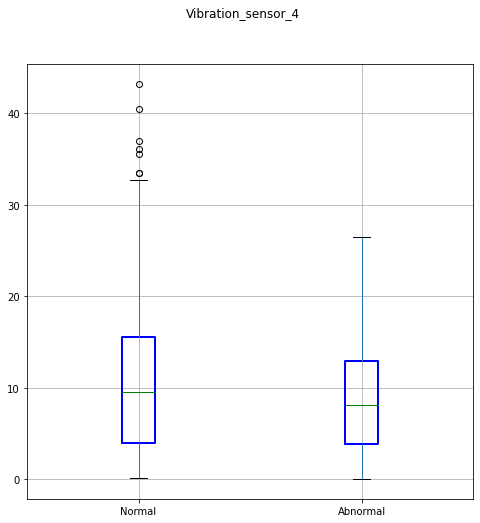

In [232]:
#Box plots for the Features of Normal and Abnormal features

#Function to get the required feature column from both groups into a single dataframe
def plotVals(col1, col2):
    #for Normal DataFrame only select the required column and rename that column to Normal for the plot
    normalColTemp = dfNormal.filter(items=[col1], axis=1)
    normalCol = normalColTemp.rename(columns={col1: 'Normal'})
    #for Abnormal DataFrame only select the required column and rename that column to Abnormal for the plot
    abnormalColTemp = dfAbnormal.filter(items=[col2], axis=1)
    abnormalCol = abnormalColTemp.rename(columns={col2: 'Abnormal'})
    
    return normalCol, abnormalCol

#loops throught each colum and generates a boxplot
for column in pandas_df.iloc[: , 1:].columns:
    #Calling function with required rows and combining them into a new DataFrame
    plotDF = pd.concat(plotVals(column,column), axis=1)

    #styling the box plots and Median line
    plt.figure(figsize=(8,8))
    medianprops = dict(linestyle='-', linewidth=1, color='g')
    boxprops = dict(linestyle='-', linewidth=2, color='b')
    #calling the boxplot
    plotDF.boxplot(column=['Normal', 'Abnormal'], boxprops=boxprops, medianprops=medianprops)
    
    plt.suptitle(column)
    #plt.savefig(column)
    plt.show()

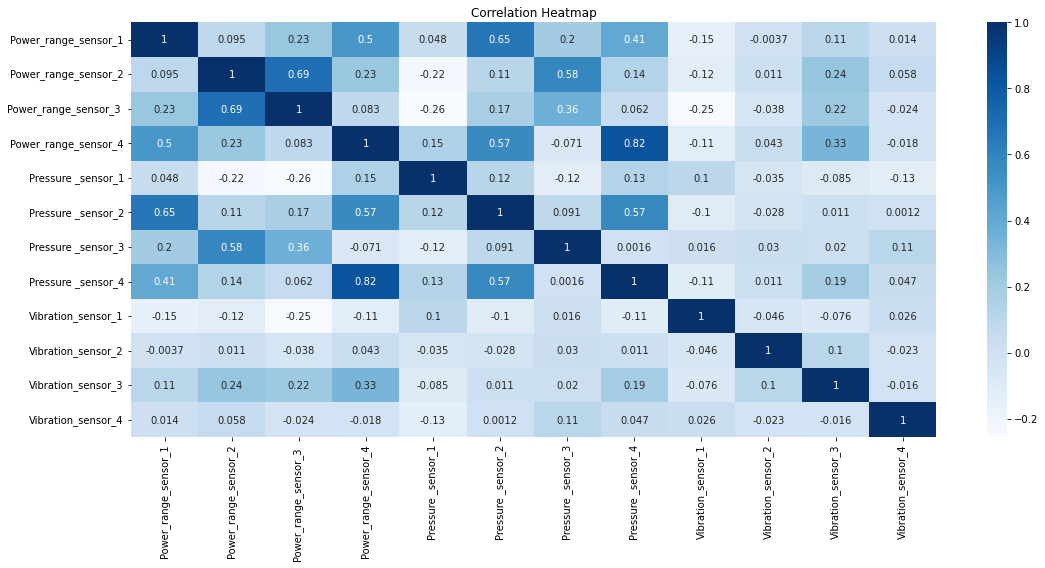

In [233]:
# task 3
#correlation between Features for the full dataset
pd.set_option('display.max_rows', None, 'display.max_columns', None) #this prints the full pandas matrix but it looks unprofessional

plt.figure(figsize=(16,8))
correlationMatrix = pandas_df.corr(method='pearson')
ax = sns.heatmap(correlationMatrix, annot=True, cmap="Blues")

ax.set_title('Correlation Heatmap')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

In [234]:
#section 2

In [235]:
#StringIndexer (on "status" column)
from pyspark.ml.feature import StringIndexer

stringIndexer = StringIndexer(inputCol="Status", outputCol="StatusIndex", stringOrderType="alphabetAsc")
stringIndexed = stringIndexer.fit(df).transform(df)
stringIndexed.select("Status","StatusIndex").show(n=900)
#stringIndexed.show()


+--------+-----------+
|  Status|StatusIndex|
+--------+-----------+
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal|        1.0|
|  Normal| 

In [236]:
#task 4
#Splitting the data into train and test samples
train, test= df.randomSplit([0.7, 0.3])

##print('Total dataset records: ', df.count())
print('Train dataset records count: ', train.count())
print('Test dataset records count: ', test.count())
##test.show(250)

Train dataset records count:  704
Test dataset records count:  292


In [237]:
#Task 5

In [238]:
#vector assembler

In [239]:
#Normaliser

In [240]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier

df = spark.createDataFrame([

    (1.0, Vectors.dense(1.0)),

    (0.0, Vectors.sparse(1, [], []))], ["label", "features"])
df.show()

stringIndexer = StringIndexer(inputCol="label", outputCol="indexed")

si_model = stringIndexer.fit(df)

td = si_model.transform(df)
td.show()

dt = DecisionTreeClassifier(maxDepth=2, labelCol="indexed", leafCol="leafId")

model = dt.fit(td)
td.show()

model.getLabelCol()

+-----+---------+
|label| features|
+-----+---------+
|  1.0|    [1.0]|
|  0.0|(1,[],[])|
+-----+---------+

+-----+---------+-------+
|label| features|indexed|
+-----+---------+-------+
|  1.0|    [1.0]|    1.0|
|  0.0|(1,[],[])|    0.0|
+-----+---------+-------+

+-----+---------+-------+
|label| features|indexed|
+-----+---------+-------+
|  1.0|    [1.0]|    1.0|
|  0.0|(1,[],[])|    0.0|
+-----+---------+-------+



'indexed'

In [241]:
def test_index_to_string(self):
        original_data = self.spark.createDataFrame(
            [(0, "a"), (1, "b"), (2, "c"), (3, "a"), (4, "a"), (5, "c")],
            ["id", "category"])
        string_indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
        string_indexer_model = string_indexer.fit(original_data)
        data = string_indexer_model.transform(original_data)
        data.show()

        model = IndexToString(inputCol="categoryIndex", outputCol="originalCategory",
                              labels=['A', 'B', 'C'])
        # the input name should match that of what IndexToString.inputCol
        model_onnx = convert_sparkml(model, 'Sparkml IndexToString', [('categoryIndex', Int64TensorType([1, 1]))])
        self.assertTrue(model_onnx is not None)
        
        
        # run the model
        predicted = model.transform(data)
        expected = predicted.select("originalCategory").toPandas().values
        data_np = data.select('categoryIndex').toPandas().values.astype(numpy.int64)
        paths = save_data_models(data_np, expected, model, model_onnx,
                                    basename="SparkmlIndexToString")
        onnx_model_path = paths[3]
        output, output_shapes = run_onnx_model(['originalCategory'], data_np, onnx_model_path)
        compare_results(expected, output, decimal=5) 
test_index_to_string()